<a href="https://colab.research.google.com/github/haynes3/Machine-Learning-Analysis/blob/main/David_Haynes_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/MSDA 665 Data/nfl_combine_2010_to_2023.csv')

Mounted at /content/drive


In [2]:
print(df.head(10))
df.info()
df.describe()
df.shape

   Year             Player  Pos          School Height  Weight  40yd  \
0  2010     Seyi Ajirotutu   WR    Fresno State    6-3   204.0  4.60   
1  2010         Rahim Alem   DE             LSU    6-3   251.0  4.75   
2  2010  Charles Alexander   DT             LSU    6-4   300.0  5.40   
3  2010  Danario Alexander   WR        Missouri    6-5   215.0  4.62   
4  2010         Nate Allen    S   South Florida    6-0   207.0  4.50   
5  2010       Tyson Alualu   DE      California    6-2   295.0  4.87   
6  2010     Jonathon Amaya    S          Nevada    6-1   203.0  4.43   
7  2010        Pat Angerer  ILB            Iowa    6-0   235.0  4.71   
8  2010     Lucien Antoine    S  Oklahoma State    6-0   215.0  4.62   
9  2010      Javier Arenas   CB         Alabama    5-9   197.0  4.60   

   Vertical  Bench  Broad Jump  3Cone  Shuttle  Drafted  Round  Pick  
0      36.0   14.0       115.0   7.22     4.39    False    NaN   NaN  
1      30.5    NaN       106.0   7.54     4.80    False    NaN   

(4741, 15)

In [ ]:
print(df.isna().sum())
print('Number of total missing entries:', df.isna().sum().sum())
print('Percent of total missing entries:', (100*df.isna().sum().sum())/(df.shape[0] * df.shape[1]), '%')

Year             0
Player           0
Pos              0
School           0
Height          29
Weight          24
40yd           547
Vertical      1010
Bench         1575
Broad Jump    1070
3Cone         1947
Shuttle       1832
Drafted          0
Round         1733
Pick          1733
dtype: int64
Number of total missing entries: 11500
Percent of total missing entries: 16.170990648948887 %


In [ ]:
df['Height'] = df['Height'].fillna(df['Height'].mode()[0])

In [ ]:
imputer = KNNImputer(n_neighbors=2)
df[['Round', 'Pick','Weight', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']] = imputer.fit_transform(df[['Round', 'Pick','Weight', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']])

In [ ]:
print(df.isna().sum())
print('Number of total missing entries:', df.isna().sum().sum())
print('Percent of total missing entries:', (100*df.isna().sum().sum())/(df.shape[0] * df.shape[1]), '%')

Year          0
Player        0
Pos           0
School        0
Height        0
Weight        0
40yd          0
Vertical      0
Bench         0
Broad Jump    0
3Cone         0
Shuttle       0
Drafted       0
Round         0
Pick          0
dtype: int64
Number of total missing entries: 0
Percent of total missing entries: 0.0 %


In [ ]:
print(df.head(10))

   Year             Player  Pos          School Height  Weight  40yd  \
0  2010     Seyi Ajirotutu   WR    Fresno State    6-3   204.0  4.60   
1  2010         Rahim Alem   DE             LSU    6-3   251.0  4.75   
2  2010  Charles Alexander   DT             LSU    6-4   300.0  5.40   
3  2010  Danario Alexander   WR        Missouri    6-5   215.0  4.62   
4  2010         Nate Allen    S   South Florida    6-0   207.0  4.50   
5  2010       Tyson Alualu   DE      California    6-2   295.0  4.87   
6  2010     Jonathon Amaya    S          Nevada    6-1   203.0  4.43   
7  2010        Pat Angerer  ILB            Iowa    6-0   235.0  4.71   
8  2010     Lucien Antoine    S  Oklahoma State    6-0   215.0  4.62   
9  2010      Javier Arenas   CB         Alabama    5-9   197.0  4.60   

   Vertical  Bench  Broad Jump  3Cone  Shuttle  Drafted  Round   Pick  
0     36.00   14.0       115.0  7.220    4.390    False    4.0  119.0  
1     30.50   30.5       106.0  7.540    4.800    False    3.5 

In [ ]:
x = df[['40yd']]
y = df[['Pick']]

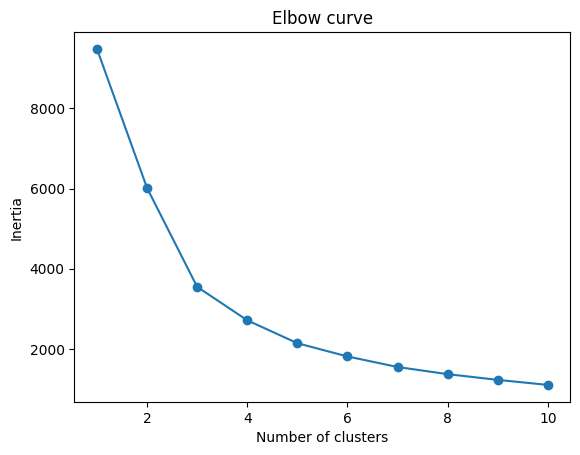

In [ ]:
data = df[['40yd', 'Pick']]
data = imputer.fit_transform(data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=1)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

[0 2 3 ... 1 2 1]


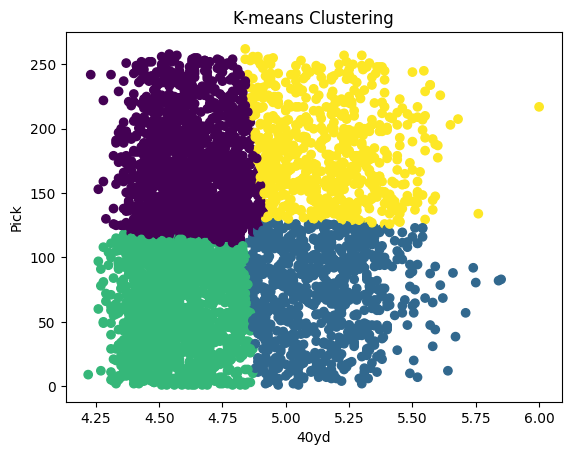

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1)
kmeans.fit(data_scaled)
print(kmeans.labels_)
plt.scatter(x, y, c=kmeans.labels_)
plt.xlabel('40yd')
plt.ylabel('Pick')
plt.title('K-means Clustering')
plt.show()

In [ ]:
X = df[['Pos', 'School', 'Height', 'Weight', '40yd', 'Vertical', 'Bench']]
y = df['Drafted']

In [ ]:
X = pd.get_dummies(data=X, drop_first=True, dtype = int)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
print(X.head(10))

   Weight  40yd  Vertical  Bench  Pos_CB  Pos_DB  Pos_DE  Pos_DL  Pos_DT  \
0   204.0  4.60     36.00   14.0       0       0       0       0       0   
1   251.0  4.75     30.50   30.5       0       0       1       0       0   
2   300.0  5.40     28.00   24.5       0       0       0       0       1   
3   215.0  4.62     29.25   24.5       0       0       0       0       0   
4   207.0  4.50     34.75   16.0       0       0       0       0       0   
5   295.0  4.87     35.50   21.0       0       0       1       0       0   
6   203.0  4.43     28.00    8.0       0       0       0       0       0   
7   235.0  4.71     35.00   26.0       0       0       0       0       0   
8   215.0  4.62     32.00   28.0       0       0       0       0       0   
9   197.0  4.60     33.25   13.0       1       0       0       0       0   

   Pos_EDGE  ...  Height_6-1  Height_6-10  Height_6-2  Height_6-3  Height_6-4  \
0         0  ...           0            0           0           1           0   
1

[[131 233]
 [ 77 508]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


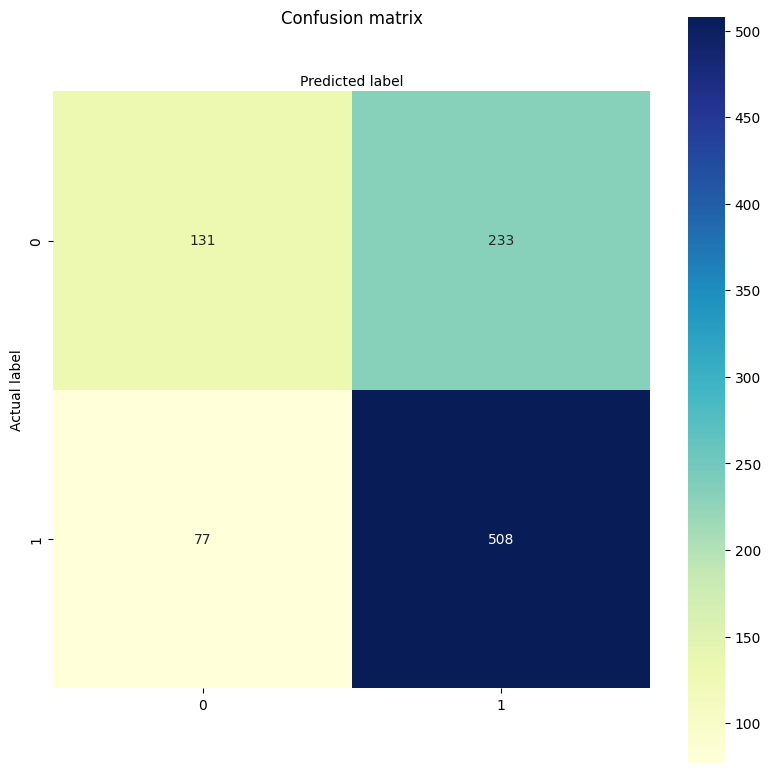

In [ ]:
class_names = ['False', 'True']
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
y_pred = logreg.predict(Xtest)
cnf_matrix = confusion_matrix(ytest, y_pred)
print(cnf_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.imshow(cnf_matrix)

In [ ]:
import seaborn as sns
class_names = ['False', 'True']
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred, target_names=class_names))

              precision    recall  f1-score   support

       False       0.63      0.36      0.46       364
        True       0.69      0.87      0.77       585

    accuracy                           0.67       949
   macro avg       0.66      0.61      0.61       949
weighted avg       0.66      0.67      0.65       949



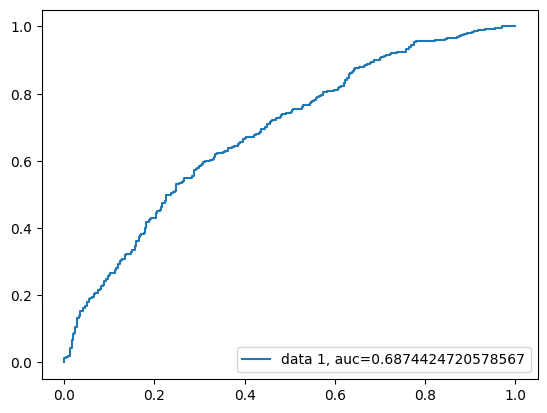

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = logreg.predict_proba(Xtest)[::,1]
fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
auc = roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()